In [1]:
import sysid.subspace
import sysid.ss
import pylab as pl
%matplotlib inline

In [2]:
ss1 = sysid.ss.StateSpaceDiscreteLinear(
    A=0.9, B=0.5, C=1, D=0, Q=0.01, R=0.01, dt=0.1)
ss1

{'A': matrix([[ 0.9]]), 'C': matrix([[1]]), 'B': matrix([[ 0.5]]), 'D': matrix([[0]]), 'Q': matrix([[ 0.01]]), 'R': matrix([[ 0.01]]), 'dt': 0.1}

In [3]:
#pl.seed(1234)
prbs1 = sysid.subspace.prbs(1000)
def f_prbs(t, x, i):
    return prbs1[i]

In [4]:
tf = 50
data = ss1.simulate(f_u=f_prbs, x0=0, tf=tf)
ss1_id = sysid.subspace.subspace_det_algo1(y=data.y, u=data.u,
    f=5, p=5, s_tol=1e-1, dt=ss1.dt)
data_id = ss1.simulate(f_u=f_prbs, x0=0, tf=tf)
ss1_id

{'A': matrix([[ 0.9020343]]), 'C': matrix([[ 1.]]), 'B': matrix([[ 0.50376204]]), 'D': matrix([[ 0.02987185]]), 'Q': matrix([[ 0.]]), 'R': matrix([[ 0.]]), 'dt': 0.1}

fit 93.801012%


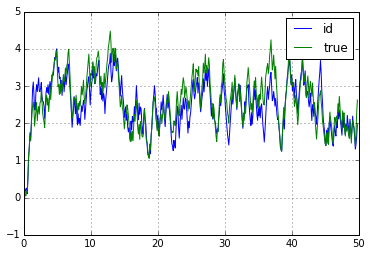

In [5]:
pl.plot(data_id.t.T, data_id.x.T, label='id');
pl.plot(data.t.T, data.x.T, label='true');
pl.legend()
pl.grid()
print 'fit {:f}%'.format(100*sysid.subspace.nrms(data_id.y, data.y))